In [1]:
import numpy as np
import pandas as pd
import cv2
import skimage as ski
from PIL import Image
import matplotlib.pylab as plt

# 1st Practicum

## RGB and BGR image comparison

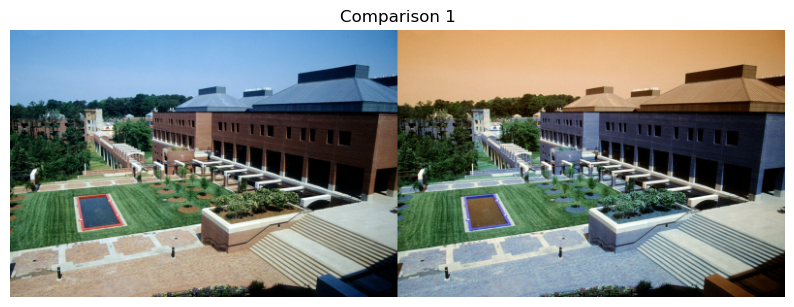

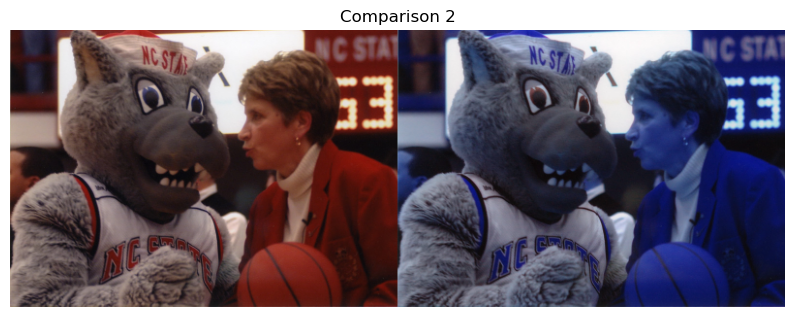

In [63]:
urls = [
    'https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg',
    'https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg',
    # 'https://placekitten.com/800/571' # don't use this. it will give an error response 571
]

for i, url in enumerate(urls):
    img = ski.io.imread(url)
    img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_frame = cv2.hconcat((img, img_bgr))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(final_frame)
    plt.axis("off")
    plt.title(f"Comparison {i+1}")
    plt.show()

## Get image size

Image resolution: (height x width) = 286 x 400


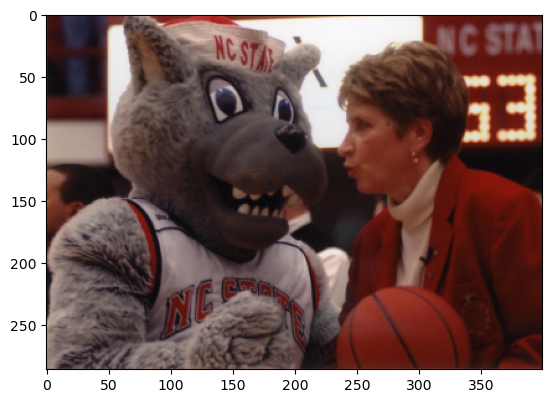

In [64]:
height = img.shape[0]
width = img.shape[1]

print(f'Image resolution: (height x width) = {height} x {width}')

plt.imshow(img)
plt.show()

## Adding Horizontal and Vertical Line on Image

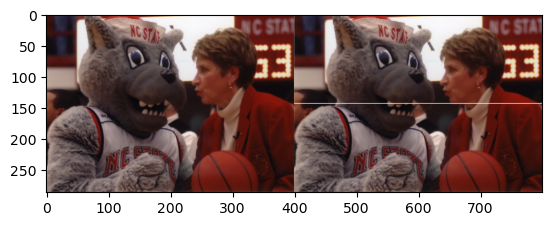

In [65]:
# img_2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img_3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_2 = img.copy()
img_3 = img.copy()

for y in range(width):
    img_3[int(height / 2), y] = [255, 255, 255]
    
final_frame = cv2.hconcat((img_2, img_3))
plt.imshow(final_frame)
plt.show()

## Questions

1. Explain why Python code execution in this practicum module is performed using Google Colab ?

    **Answer:** The reason for using Google Colab is that it is much easier than using local tools such as Jupyter Notebook or VSCode. Users don't need to set up any related tools like Python or manage dependencies with Anaconda. If the program requires heavy computation, Google Colab is the best platform, especially if the user doesn't have a device with sufficient specifications.

2. Explain the purpose of each library in practicum step eight. Are all of these libraries required for this practicum session?

    **Answer:** From these libraries:
    ```py
    import numpy as np
    import pandas as pd
    import cv2
    import skimage as ski
    from PIL import Image
    import matplotlib.pylab as plt
    ```

    Only the libraries `skimage`, `cv2`, and `matplotlib` are used if the user displays the image with `matplotlib` instead of `cv2.imshow()`.

    `numpy` and `pandas` are needed for mathematical computations, from simple arithmetic to more complex math. `cv2` (OpenCV) is used for managing image data, which includes reading and transforming images. `PIL` is a simpler and more lightweight alternative to `cv2` (OpenCV). `matplotlib` is useful for data visualization.
    
3. In the trial run for step 9, there is a snippet of program code as follows:

    ```py
    img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
    ```

    What is the purpose of this program code, and what is the impact if it is not executed?

    **Answer:** That code will resize the image, create a new image, and store it in the img variable. The resize scale is **0.5** of its original width and height `(fx=0.5, fy=0.5)`. If this code is not executed, the image will not be resized and will remain at its original size.


4. Consider the following snippet of program code:

    ```py
    for y in range(width):
        img_3[int(height / 2), y] = [255, 255, 255]
    ```

    What is the purpose of the code `[255, 255, 255]` ?

    **Answer:** That code will change the color of the pixels along the image's entire width at the middle of its height to white.

5. Explain the relationship between pixels and high or low image resolution.

    **Answer:** High image resolution means an image will have a large number of pixels. Low image resolution means an image will not have as many pixels, which can make the image look blurry.

## Assignment

1. Add a vertical and diagonal white line to the image

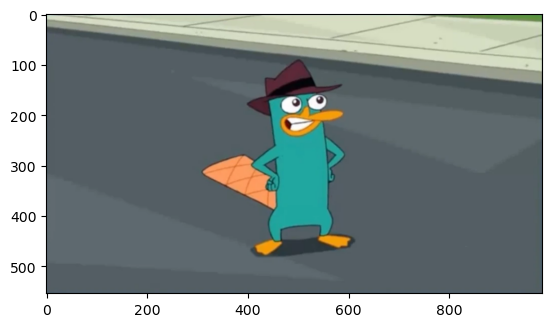

In [2]:
perry_img = cv2.imread('./assets/perry-the-platypus.webp')

if perry_img is None:
    raise Exception('Perry the platypus image is not found!')

perry_img_rgb = cv2.cvtColor(perry_img, cv2.COLOR_BGR2RGB)

plt.imshow(perry_img_rgb)

add vertical line

height: 554
width: 985


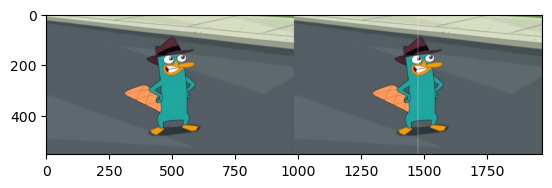

In [3]:
perry_img_rgb_copy_1 = perry_img_rgb.copy()

height = perry_img_rgb_copy_1.shape[0]
width = perry_img_rgb_copy_1.shape[1]

for x in range(height):
    perry_img_rgb_copy_1[x, int(width / 2)] = [255, 255, 255]

final_frame = cv2.hconcat((perry_img_rgb, perry_img_rgb_copy_1))
plt.imshow(final_frame)

print(f'height: {height}')
print(f'width: {width}')

add diagonal line

height: 554
width: 985
ratio: 1.7779783393501805


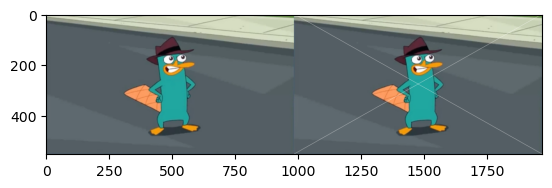

In [5]:
perry_img_rgb_copy_2 = perry_img_rgb.copy()

height, width = perry_img_rgb_copy_2.shape[:2]

for x in range(width):
    y1 = int(height * x / width)
    y2 = int(height * (width - x) / width)
    
    if 0 <= y1 < height:
        perry_img_rgb_copy_2[y1, x] = [255, 255, 255]
    if 0 <= y2 < height:
        perry_img_rgb_copy_2[y2, x] = [255, 255, 255]

final_frame = cv2.hconcat((perry_img_rgb, perry_img_rgb_copy_2))
plt.imshow(final_frame)

print(f'height: {height}')
print(f'width: {width}')
print(f'ratio: {width / height}')

2. Add a white horizontal line of a specific length

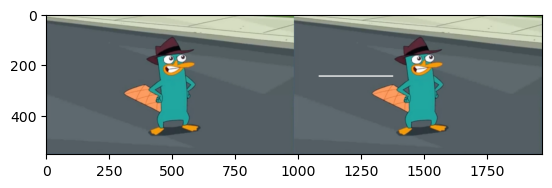

In [6]:
perry_img_rgb_copy_3 = perry_img_rgb.copy()

height, width = perry_img_rgb_copy_3.shape[:2]

start_width = int(width * 0.1)
end_width = int(width * 0.4)
line_height_pos = int(height * 0.44)

perry_img_rgb_copy_3[line_height_pos:line_height_pos+5, start_width:end_width] = 255


final_frame = cv2.hconcat((perry_img_rgb, perry_img_rgb_copy_3))
plt.imshow(final_frame)

3. Add a rectangle using a collection of white pixels somewhere else in the image

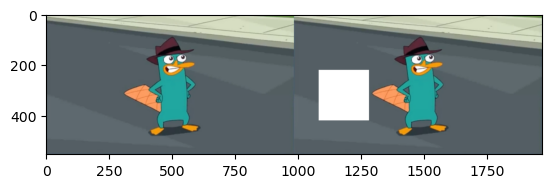

In [9]:
perry_img_rgb_copy_4 = perry_img_rgb.copy()

height, width = perry_img_rgb_copy_4.shape[:2]

start_width = int(width * 0.1)
start_height = int(height * 0.4)
end_width = start_width + 200
end_height = start_height + 200

perry_img_rgb_copy_4[start_height:end_height, start_width:end_width] = 255

final_frame = cv2.hconcat((perry_img_rgb, perry_img_rgb_copy_4))
plt.imshow(final_frame)

---

# 2nd Practicum - Understanding Channel in Color Space

In [60]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np

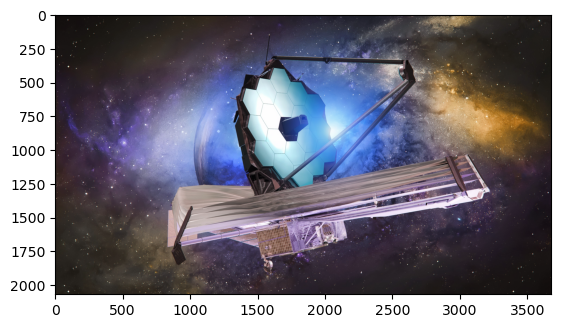

In [61]:
img = cv2.imread('./assets/james-webb-space-telescope.jpg')

if img is None:
    raise Exception('Image not found!')

plt.imshow(img)

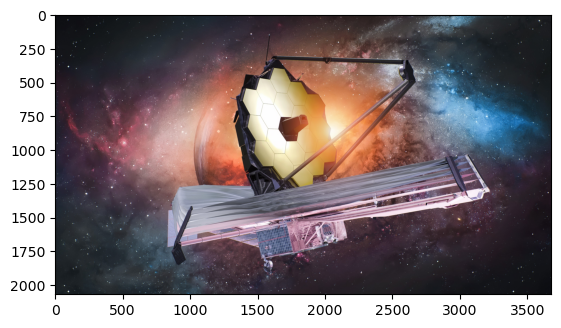

In [62]:
# convert to RGB like the original 
if img is None:
    raise Exception('Image not found!')

img_2 = img.copy()

img_3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_3)

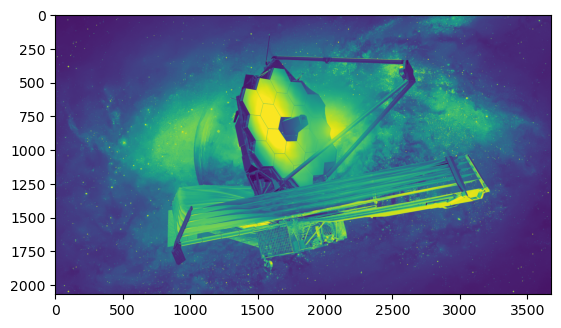

In [63]:
# grayscale image
img_gray = cv2.imread('./assets/james-webb-space-telescope.jpg', cv2.IMREAD_GRAYSCALE)
if img_gray is None:
    raise Exception('Image not found!')

plt.imshow(img_gray)

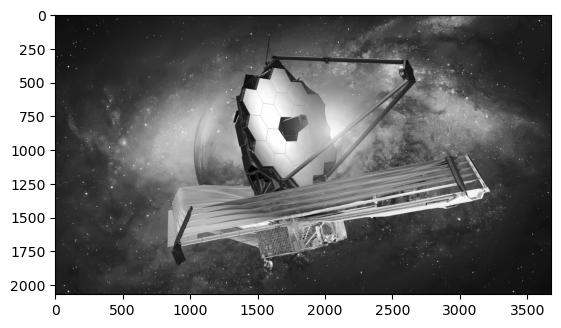

In [64]:
# only display colormap `gray`
plt.imshow(img_gray, cmap='gray') # type: ignore

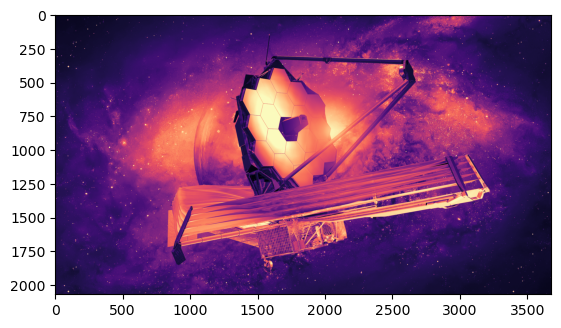

In [65]:
# only display colormap `magma`
plt.imshow(img_gray, cmap='magma')  # type: ignore

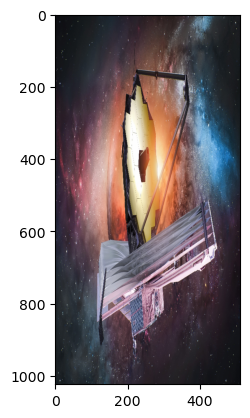

In [66]:
img_4 = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (512, 1024)) # type: ignore
plt.imshow(img_4)

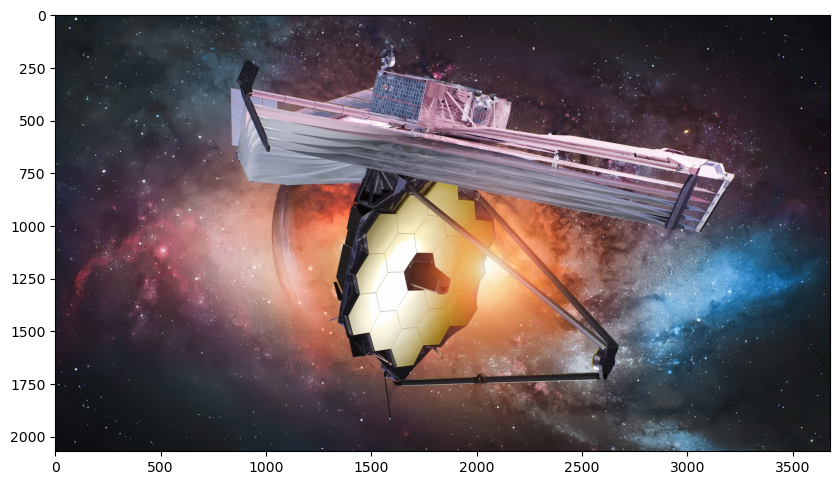

In [67]:
img_5 = cv2.flip(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 0) # type: ignore

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(img_5)

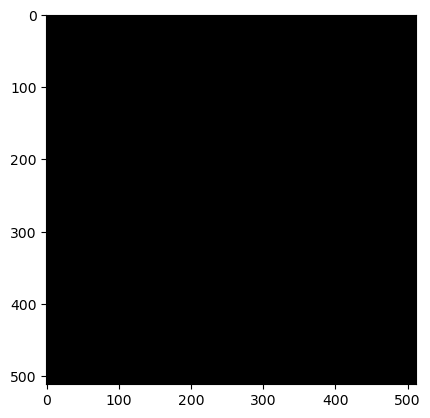

In [68]:
# display a black image
black_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)
plt.imshow(black_img)

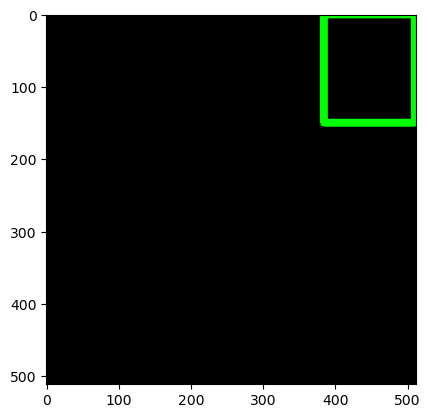

In [69]:
cv2.rectangle(black_img, pt1=(384, 0), pt2=(510, 150), color=(0, 255, 0), thickness=10)
plt.imshow(black_img)

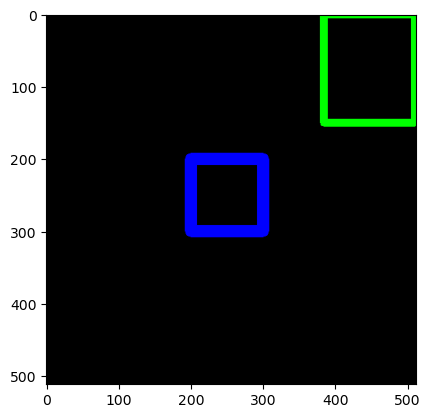

In [70]:
cv2.rectangle(black_img, pt1=(200, 200), pt2=(300, 300), color=(0, 0, 255), thickness=15)
plt.imshow(black_img)

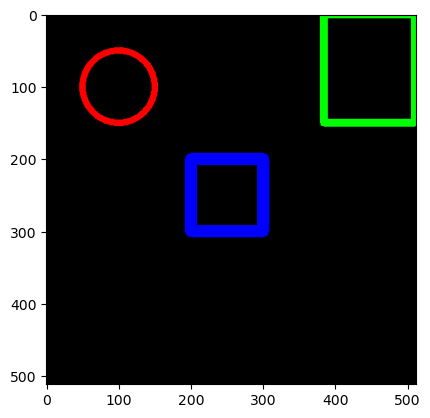

In [71]:
cv2.circle(black_img, center=(100, 100), radius=50, color=(255, 0, 0), thickness=8)
plt.imshow(black_img)

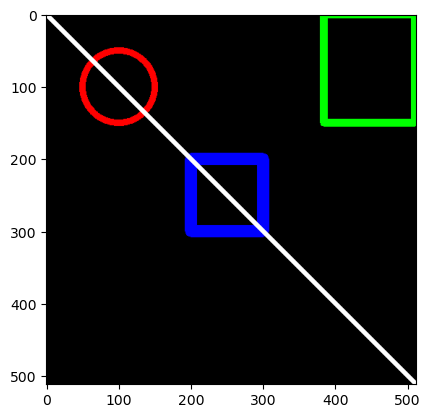

In [72]:
cv2.line(black_img, pt1=(0, 0), pt2=(512, 512), color=(255, 255, 255), thickness=5)
plt.imshow(black_img)

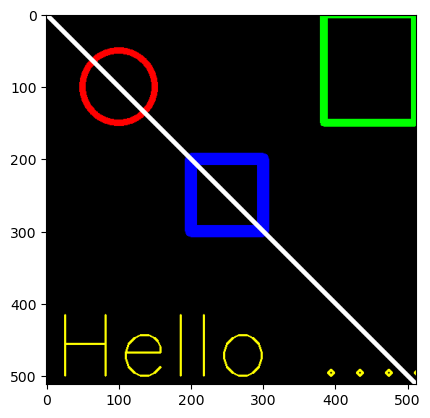

In [73]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(black_img, text='Hello ...!', org=(10, 500), fontFace=font, fontScale=4, color=(255, 255, 0), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(black_img)

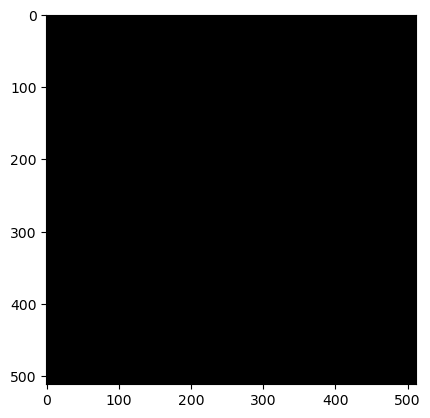

In [83]:
black_img_2 = np.zeros(shape=(512, 512, 3), dtype=np.int32)
plt.imshow(black_img_2)

In [84]:
vertices = np.array([
    [100, 300],
    [200, 200],
    [400, 300],
    [200, 400]
], dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [85]:
pts = vertices.reshape((-1, 1, 2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

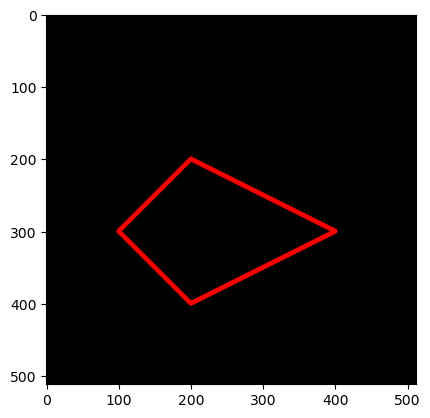

In [86]:
cv2.polylines(black_img_2, [pts], isClosed=True, color=(255, 0, 0), thickness=5)
plt.imshow(black_img_2)

## Questions

1. What is the difference between displaying an image with and without Matplotlib?

    Answer: Displaying an image with Matplotlib will show the image inside a Cartesian-like diagram with axes for width and height. A larger image will have larger values for width and height. It also can help if there is something object in specific posiiton/coordinate.

2. What are the differences and effects of creating a black image using `int16` versus `int32` data types ?

    Answer: There is no significant difference. Using a higher integer type like `int32` just means we can store much larger values in a single pixel. For example, `int32` ranges from **-2,147,483,648 to 2,147,483,647**, while `int16` ranges from **-32,768 to 32,767**. For basic computer vision tasks, this is unnecessary because we only need values from 0 to 255 (RGB scale). Even `int16` is already overkill. The correct choice is uint8 (unsigned integer), which covers the range **0 to 255** exactly.

3. What is the purpose of `google.colab.patches import cv2_imshow` in the following code snippet?

    ```py
    from google.colab.patches import cv2_imshow
    from skimage import io
    ```

    Answer: That code is used to display an image from an OpenCV (`cv2`) object in the Google Colab environment.

4. What is the purpose of `skimage import io` in the code from question #3?

    Answer: That code imports the `io` (input-output) module from the scikit-image library. This module is useful for reading and writing images.